In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from PIL import Image
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import cv2

### Segmentation map

In [3]:
data_path_material_id_c_stud = Path('../data/raw/cStud/Material_ID/')
data_path_material_id_cmu = Path('../data/raw/cmu/Material_ID/')
data_path_material_id_tile = Path('../data/raw/tile/Material_ID/')
data_path_material_id_wood = Path('../data/raw/WD/Material_ID/')

In [39]:
test_img = np.array(Image.open(data_path_material_id_wood / 'Frame_00071.png'))[:,:,:-1]
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=test_img, ddepth=-1, kernel=kernel)

In [40]:
colors = list(zip(*np.unique(test_img.reshape(-1,3), axis=0, return_counts=True)))
colors = sorted(colors, key=lambda x : x[1], reverse=True)
print(os.listdir(data_path_material_id_c_stud)[0], len(colors))

Frame_00059.png 280


In [41]:
def showColor(rgb):
    plt.imshow(np.tile(rgb, [1,1,1]))

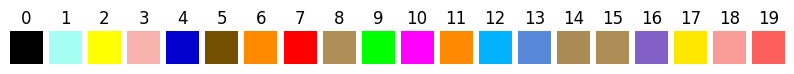

In [42]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.axis('off')
    plt.title(str(i))
    showColor(colors[i][0])

In [ ]:
# 2 6

In [43]:
colors[8][0]

array([175, 142,  87], dtype=uint8)

Color rule
- 6 == 10
- 5 == 13
- 13까지

In [8]:
colors_rgb = list(map(lambda x : list(x[0]), colors))

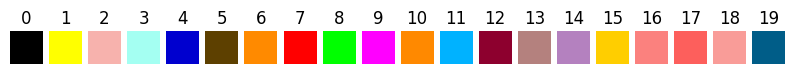

In [10]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.axis('off')
    plt.title(str(i))
    showColor(colors_rgb[i])

### Clustering

In [ ]:
from sklearn import cluster

In [ ]:
centers_init, indices = cluster.kmeans_plusplus(np.array(colors_rgb), n_clusters=15, random_state=0)

In [ ]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(1, 15, i+1)
    plt.axis('off')
    showColor(centers_init[i])    

In [12]:
def nearestIdx(centerPoints, data):
    return np.argmin(((centerPoints.astype(np.float32) - data)**2).sum(-1)**(0.5))

def selectMostColor(colors_rgb, indexes):
    unque_index = np.unique(indexes)
    index_2_colors = {}
    for i in unque_index:
        
        [i[1] for i in colors][np.array(indexes) == i]
        index_2_colors[i]= values[np.argmax(cnt)]
    return index_2_colors

In [13]:
colors_rgb_indexs = np.array([nearestIdx(np.array(colors_rgb[:14]), i) for i in colors_rgb])

In [15]:
def rgb2idx(rgb, colors_rgb_indexs, colors_rgb) -> int:
    return colors_rgb_indexs[colors_rgb.index(list(rgb))]

In [16]:
idx_map = [rgb2idx(i, colors_rgb_indexs=colors_rgb_indexs, colors_rgb=colors_rgb) for i in test_img.reshape(-1,3)]

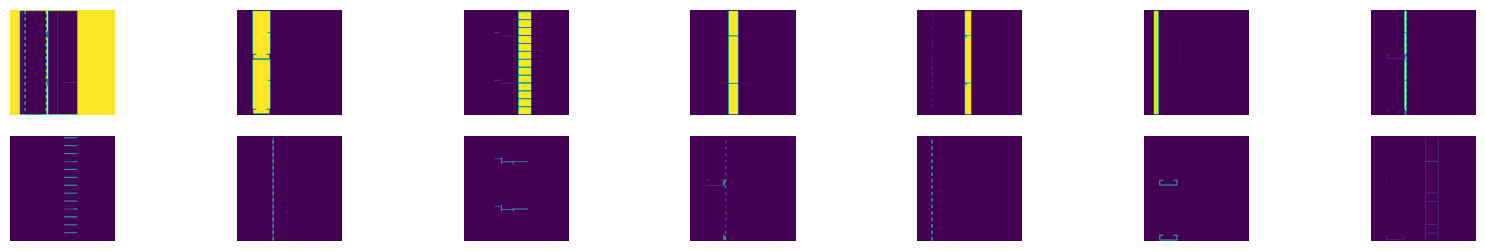

In [31]:
plt.figure(figsize=(20,3))
for i in range(14):
    plt.subplot(2,7,i+1)
    plt.axis('off')
    plt.imshow(np.array(idx_map).reshape(1024,1024)==i)

In [30]:
colors_rgb[:14]

[[0, 0, 0],
 [255, 255, 0],
 [247, 178, 173],
 [164, 255, 242],
 [0, 0, 207],
 [93, 64, 0],
 [255, 138, 0],
 [255, 0, 0],
 [0, 255, 0],
 [255, 0, 255],
 [255, 137, 0],
 [0, 178, 255],
 [141, 0, 46],
 [180, 129, 126]]

In [20]:
final_list = np.array([colors_rgb[np.where(colors_rgb_indexs==i)[0][0]] for i in range(15)])[[0, 1, 3, 6, 7, 8,9, 10, 11, 12, 14]]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
final_list